In [1]:
from Constrained_Functions import *
from penguins_Algorithm_modified_3 import *
from ParticleSwarm import *

In [2]:
EPOWIV(-8192, 8192, 9, 50, 50, 1, 1)

(1.0, array([0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [9]:
PCA(-8192, 8192, 9, 100, 500, 1, 1)

(2528997.056249818,
 array([ 1918.7791551 ,  2216.65328854, -2745.16601736, -3098.2774916 ,
          184.08235907,   706.75821946,   691.11551068,   218.88262327,
          -85.58815317]))

In [ ]:
particle_swarm_optimization(100, 2, 300, 0.3, 0.6, 0.9, 'ACKLEY', -10, 0)

In [6]:
PCAWeighted(-8192, 8192, 9, 100, 1000, 1, 1)

(34026.94165075597,
 array([ 26.73068531,   4.76239746,  19.0261848 , -17.52008155,
          5.27368115,  14.57912364, -32.08898098,  -6.75126299,
         13.79503758]))

In [26]:
PCA_classic(-8192, 8192, 9, 100, 100, 1, 1)

(133583903.20263699,
 array([ 6579.24270327,  3910.25411842, -1450.94835504, -2129.9389002 ,
         -423.44496289, -1005.56657004, -3065.69104681,   -94.59739278,
          523.91285145]))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def RosenbrockConstrained1(x):
    if ((x[0] - 1)**3 - x[1] + 1) <= 0 and (x[0] + x[1] - 2) <= 0:
        return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
    else:
        return float('Inf')

# Define the range of x and y values
x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)

# Calculate the function values
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i, j] = RosenbrockConstrained1([X[i, j], Y[i, j]])

# Create the contour plot
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='Function Value')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of RosenbrockConstrained1')
plt.show()


In [1]:
from FunctionCall import *

In [2]:
from penguins_Algorithm_modified_3 import *
from ParticleSwarm import *

In [ ]:
testFunctions = pd.read_csv('ConstrainedProblems.csv')

In [6]:
testFunctions[testFunctions.iloc[:,1] == 'Eggholder']

,Python function name,Function,Lower Bound,Upper Bound,Dimension
4,EGGHOLDER,Eggholder,-512.0,512.0,2


In [10]:
EPOWIV(-500, 500, 10, 100, 300, 1, 'Schwefel')

(1623.9354942387208,
 array([423.88434481, 415.28530402, 405.90944701, 439.43672307,
          0.67567788, 395.68758699, -31.21750996, 218.58055525,
        428.80124591, -19.1092228 ]))

In [9]:
PCA(-500, 500, 10, 100, 300, 1, 'Schwefel')

(22.689016687718322,
 array([418.77779548, 420.91368443, 422.3532617 , 414.56781618,
        431.25411538, 422.31871059, 417.06572813, 418.31918366,
        419.35119067, 421.07159401]))

In [2]:
i = 1
funcntionName, LB, UB, dim = testFunctions.iloc[i,0], testFunctions.iloc[i,2]\
,testFunctions.iloc[i,3], testFunctions.iloc[i,4]

In [3]:
results = []
for i in range(testFunctions.shape[0]):
    funcntionName, LB, UB, dim = testFunctions.iloc[i,0], testFunctions.iloc[i,2]\
    ,testFunctions.iloc[i,3], testFunctions.iloc[i,4]
    results.append(EPOWIV(LB, UB, dim, 100, 100, 1, funcntionName)[0])

In [4]:
with open('testingResult.csv', 'w') as fl:
    for i in results:
        fl.write(str(i) + '\n')

In [3]:
MeanResult = {'Function':[],'EPOIV Mean':[], 'EPOW Mean':[], 'EPO Classical Mean':[], 'EPOWIV Mean':[]\
              ,'EPOIV Std':[], 'EPOW Std':[], 'EPO Classical Std':[], 'EPOWIV Std':[]}
BoxPlotsData = {}
for i in range(testFunctions.shape[0]):
    FunctionName = testFunctions.iloc[i,0]
    BoxPlotsData[FunctionName] = []
    dim = testFunctions.iloc[i, 4]
    MeanResult['Function'].append(FunctionName)
    LB = float(testFunctions.iloc[i, 2])
    UB = float(testFunctions.iloc[i, 3])
    result = np.array([PCA(LB, UB, dim, 100, 100, 1, FunctionName)[0] for _ in range(10)])
    BoxPlotsData[FunctionName].append(result)
    MeanResult['EPOIV Mean'].append(result.mean())
    MeanResult['EPOIV Std'].append(result.std())
    result = np.array([PCAWeighted(LB, UB, dim, 100, 100, 1, FunctionName)[0] for _ in range(10)])
    BoxPlotsData[FunctionName].append(result)
    MeanResult['EPOW Mean'].append(result.mean())
    MeanResult['EPOW Std'].append(result.std())
    result = np.array([PCA_classic(LB, UB, dim, 100, 100, 1, FunctionName)[0] for _ in range(10)])
    BoxPlotsData[FunctionName].append(result)
    MeanResult['EPO Classical Mean'].append(result.mean())
    MeanResult['EPO Classical Std'].append(result.std())
    result = np.array([EPOWIV(LB, UB, dim, 100, 100, 1, FunctionName)[0]\
                        for _ in range(10)])
    BoxPlotsData[FunctionName].append(result)
    MeanResult['EPOWIV Mean'].append(result.mean())
    MeanResult['EPOWIV Std'].append(result.std())    

/Users/zicooo82/Desktop/Penguin Algorithm/ConstrainedFunctions/penguins_Algorithm_modified_3.py:157: RuntimeWarning: invalid value encountered in double_scalars
  w1, w2 = EvalP/TotalEval, EvalModified/TotalEval


In [31]:
pd.DataFrame(MeanResult).to_csv('Results_08_09_2023.csv')

In [6]:
funcNames = list(BoxPlotsData.keys())

In [7]:
funcNames[0:15]

['ACKLEY',
 'BUKIN',
 'CROSS_IN_TRAY',
 'DROP_WAVE',
 'EGGHOLDER',
 'GRIEWANK',
 'HOLDER_TABLE',
 'Langermann',
 'Levy',
 'Rastrigin',
 'schaffer2',
 'schaffer4',
 'Schwefel',
 'Shubert',
 'Bohachevsky']

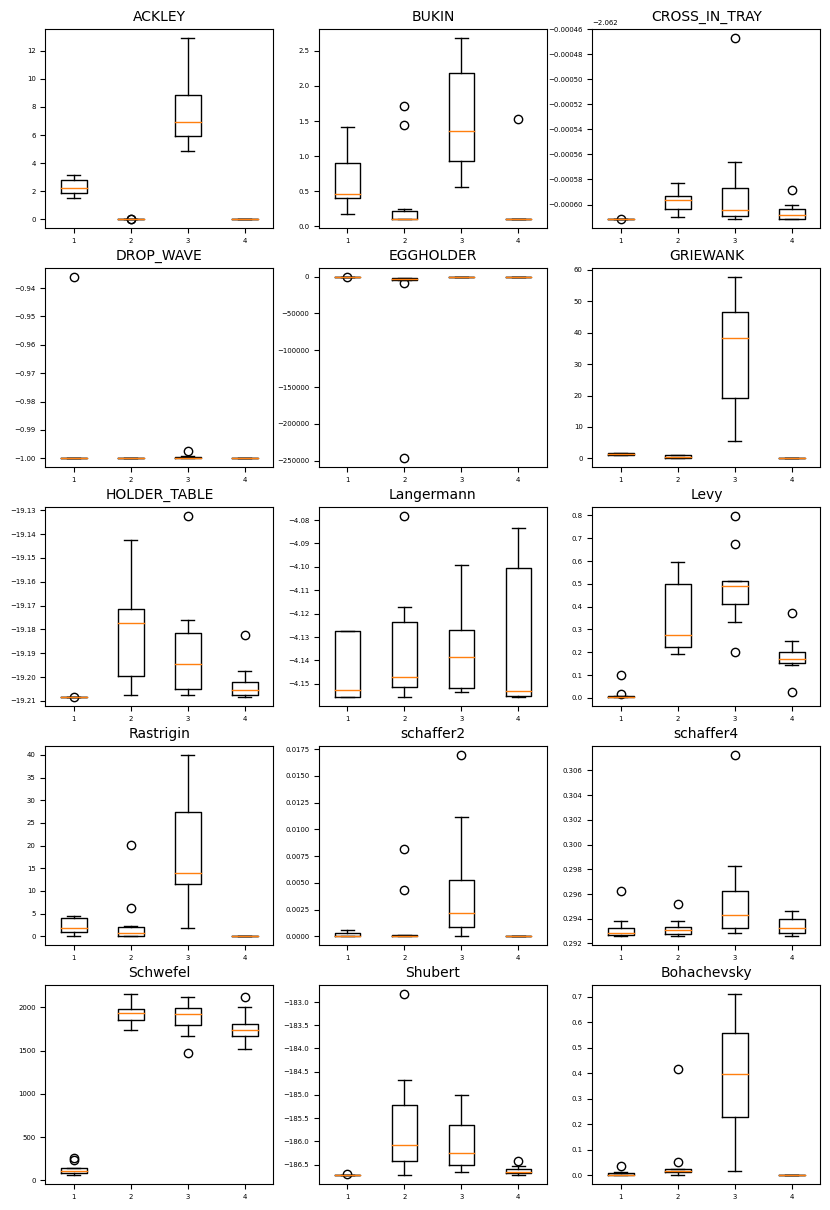

In [24]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 15))
plt.rcParams.update({'font.size': 5})
# plt.xticks(fontsize=5)
# plt.yticks(fontsize = 5)
for i in range(0,15):
    functionName = funcNames[i]
    fig.add_subplot(5, 3, i+1)
    plt.boxplot(BoxPlotsData[functionName])
    plt.title(functionName, fontsize = 10)
    

In [28]:
len(funcNames)

31

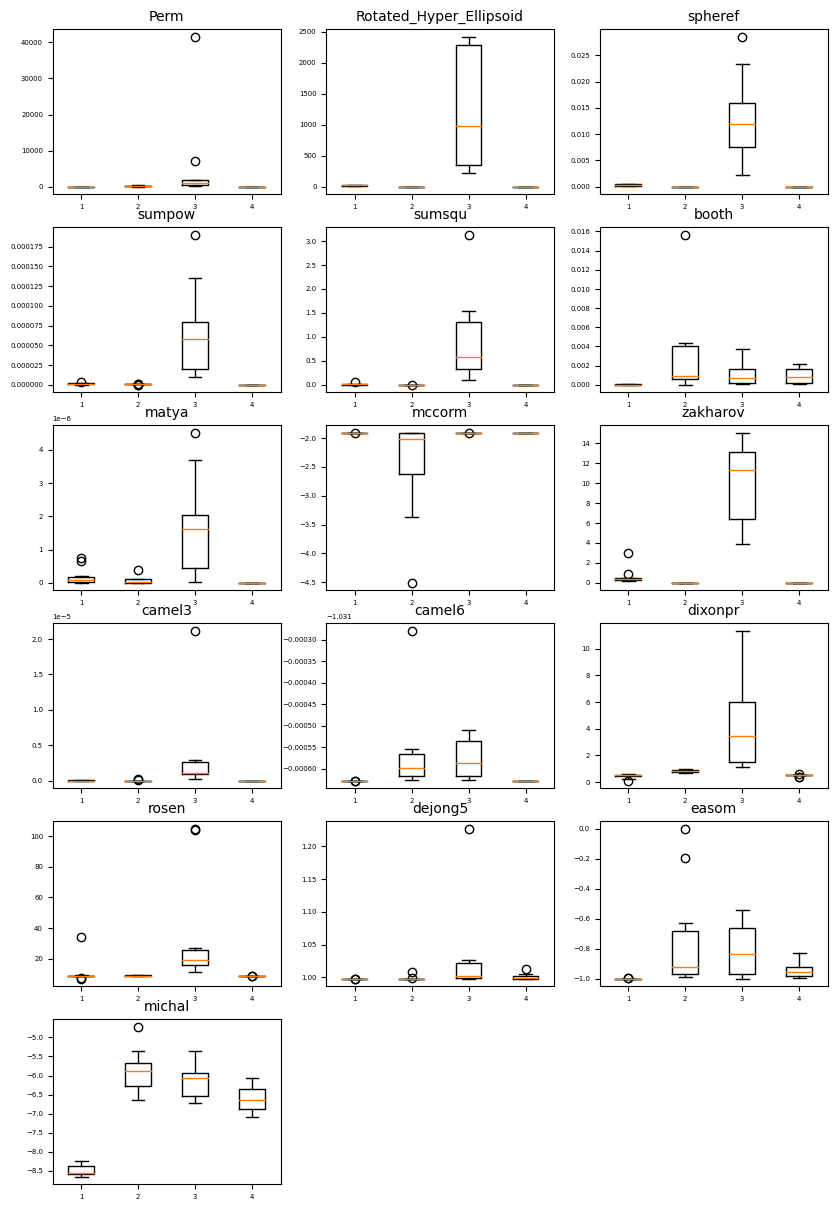

In [29]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 15))
plt.rcParams.update({'font.size': 5})
# plt.xticks(fontsize=5)
# plt.yticks(fontsize = 5)
j = 1
for i in range(15,31):
    functionName = funcNames[i]
    fig.add_subplot(6, 3, j)
    j +=1
    plt.boxplot(BoxPlotsData[functionName])
    plt.title(functionName, fontsize = 10)

In [27]:
j

16

In [13]:
i

'ACKLEY'

In [ ]:
MeanResult['EPOW Std'] = MeanResult['EPOW Std'][0:31]

In [ ]:
pd.DataFrame(MeanResult).to_csv('Results 31.csv', index = False)

In [ ]:
from scipy.stats import wilcoxon

# Sample data
data1 = [6, 8, 14, 16, 18]
data2 = [6, 9, 14, 16, 18]

# Perform the Wilcoxon Signed-Rank Test
statistic, p_value = wilcoxon(data1, data2)
print("Wilcoxon statistic:", statistic)
print("p-value:", p_value)

In [11]:
from cec2019comp100digit import cec2019comp100digit

In [12]:
bench = cec2019comp100digit
bench.init(3, 10) # Init function 3 with dimension 10

In [13]:
bench.eval(np.random.uniform(-5, 5, 10))

13.711251802845885